# Mall Customer Segmentation Data (Segmentación de Clientes)

Este dataset proporciona información sobre los clientes de un centro comercial, incluyendo su ID, edad, género, ingresos y puntuación de gasto.

La Puntuación de Gasto (Spending Score) se asigna a los clientes en función de parámetros definidos como el comportamiento del cliente y los datos de compra. 

El objetivo es segmentar a los clientes en grupos significativos para comprender mejor su comportamiento y adaptar las estrategias de marketing en consecuencia.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv(os.path.join("resources","Mall_Customers.csv"))

In [3]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Selecting features for clusttering 
X=dataset[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
X = StandardScaler().fit_transform(X)

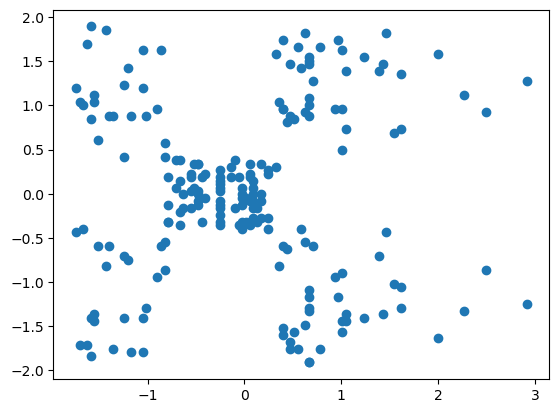

In [6]:
plt.scatter(X[:,0], X[:,1])

In [7]:
from sklearn.cluster import KMeans
# Elbow method to find the optimal number of clusters
wcss=[] # within clusters sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

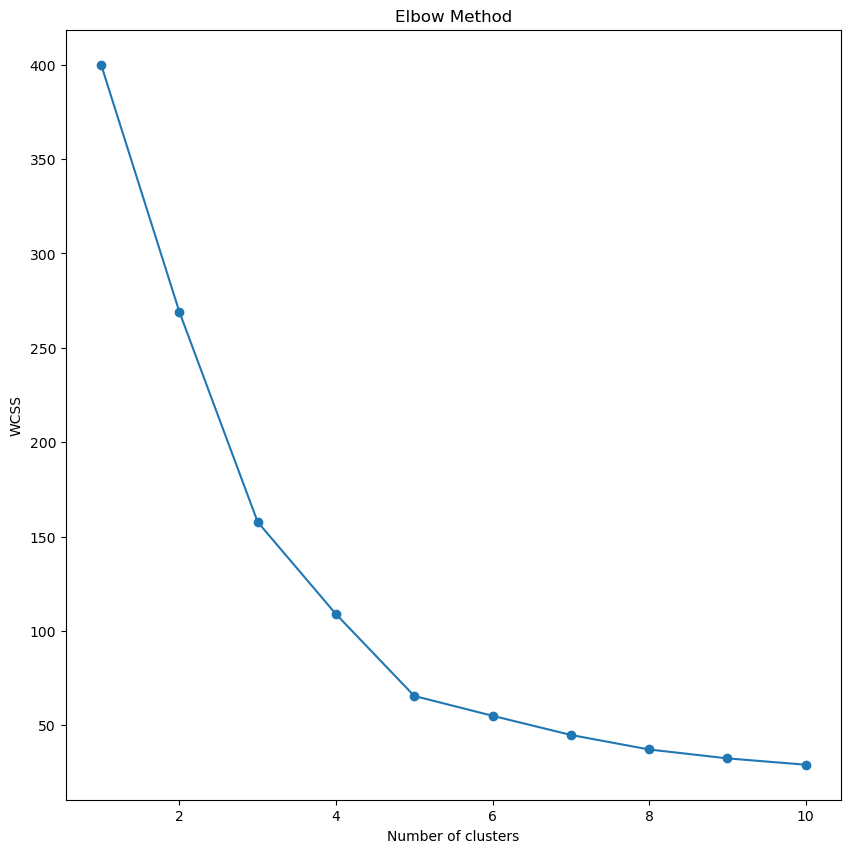

In [8]:
#Plot the elbow method
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

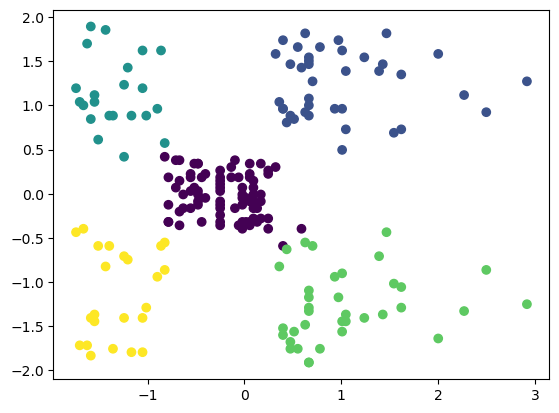

In [9]:
y_pred = KMeans(n_clusters=5, random_state=1).fit_predict(X)

# Graficar las predicciones.
plt.scatter(X[:,0], X[:,1], c = y_pred)

## Agglomerative Clustering

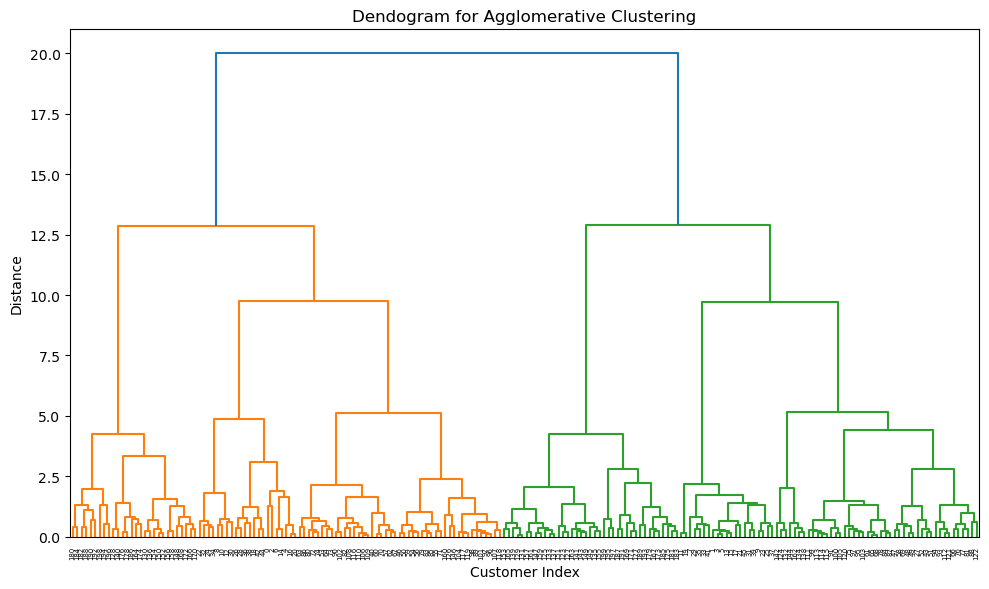

In [10]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

# Select the relvant columns for clustering 
X_dend=dataset[['Age','Annual Income (k$)','Spending Score (1-100)']]

# Normalise the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_dend)

# Perform Agglomerative Clustering to obtain the linkage matrix
Z=linkage(X_scaled, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(10,6))
dendrogram(Z,labels=dataset.index.values,orientation='top')
plt.title("Dendogram for Agglomerative Clustering")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
dataset_1=dataset.drop(['Gender'],axis=1)

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Normalise the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(dataset_1)

cluster_ward_5 = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_ward_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')

y_ward_5 = cluster_ward_5.fit_predict(X_scaled)
y_ward_2 = cluster_ward_2.fit_predict(X_scaled)

dataset_1['agglomerative_ward_2'] = y_ward_2
dataset_1['agglomerative_ward_5'] = y_ward_5

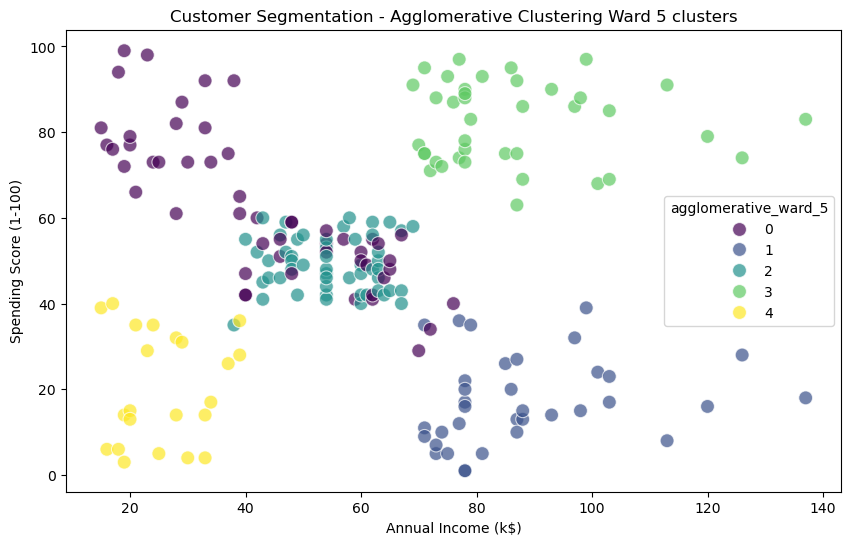

In [13]:
#Plotting the clusters for 5 clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)', hue='agglomerative_ward_5', palette='viridis', s=100, alpha=0.7)

plt.title("Customer Segmentation - Agglomerative Clustering Ward 5 clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

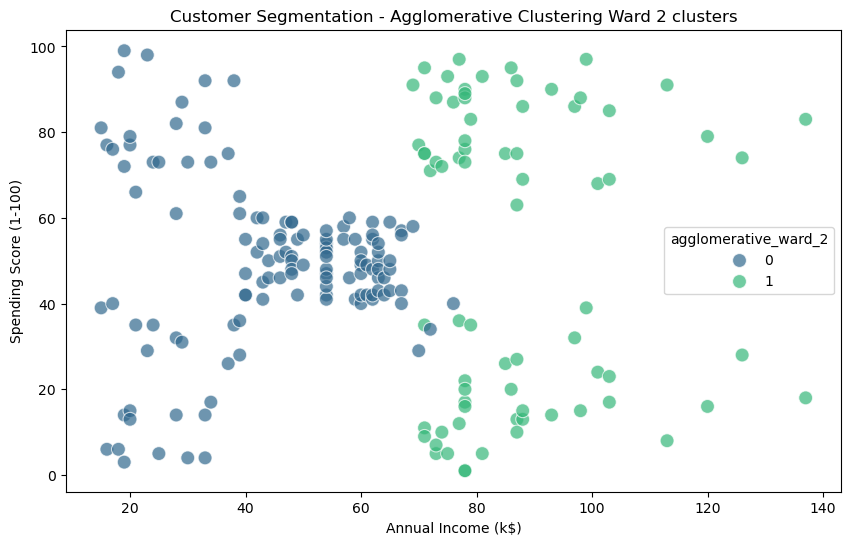

In [14]:
#Plotting the clusters for 2 clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)', hue='agglomerative_ward_2', palette='viridis', s=100, alpha=0.7)

plt.title("Customer Segmentation - Agglomerative Clustering Ward 2 clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Métricas

**Interpretación de la Puntuación de Silueta**

La silueta oscila entre -1 y 1 y mide qué tan bien pertenece un punto al cluster asignado, en comparación con los otros clusters.

- +1: Indica que la muestra está lejos de los clusters vecinos y bien ubicada en su cluster. Esto significa que los clusters están bien separados.
- 0: Indica que la muestra está en o muy cerca del límite de decisión entre dos clusters vecinos. Esto sugiere que los clusters no están bien separados y pueden superponerse.
- -1: Indica que la muestra podría haber sido asignada al cluster incorrecto, ya que está más cerca de un cluster vecino que del cluster al que fue asignada.

**Interpretación de la Puntuación de Davies-Bouldin**

- Valores de **DBI más bajos** indican una mejor agrupación porque implican que los **clusters son compactos** y están bien separados entre sí.
- Valores de **DBI más altos** sugieren que los **clusters no están bien separados** y pueden superponerse significativamente.

**Interpretación de la Puntuación de Calinski-Harabasz**

El índice de Calinski-Harabasz, también conocido como criterio de razón de varianza, es otra métrica utilizada para evaluar la calidad del algoritmo de clustering.

- **Valores de CHI más altos** indican una mejor agrupación porque implican que los clusters están bien separados y compactos.
- **Valores de CHI más bajos** sugieren una agrupación más pobre con más superposición y clusters menos distintos.

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [16]:
silhouette_avg_agg=silhouette_score(X_scaled,y_ward_5)
davies_bouldin_avg_agg=davies_bouldin_score(X_scaled,y_ward_5)
calinski_harabasz_avg_agg=calinski_harabasz_score(X_scaled,y_ward_5)

print(f'Agglomerative Clustering - Silhouette Score:{silhouette_avg_agg}')
print(f"Agglomerative Clustering - Devies Bouldin Score:{davies_bouldin_avg_agg}")
print(f"Agglomerative Clustering - Calinskti Harabasz Score:{calinski_harabasz_avg_agg}")

Agglomerative Clustering - Silhouette Score:0.41786701492690886
Agglomerative Clustering - Devies Bouldin Score:0.850547571342671
Agglomerative Clustering - Calinskti Harabasz Score:128.80506347819335


In [17]:
silhouette_avg_agg=silhouette_score(X_scaled,y_ward_2)
davies_bouldin_avg_agg=davies_bouldin_score(X_scaled,y_ward_2)
calinski_harabasz_avg_agg=calinski_harabasz_score(X_scaled,y_ward_2)

print(f'Agglomerative Clustering - Silhouette Score:{silhouette_avg_agg}')
print(f"Agglomerative Clustering - Devies Bouldin Score:{davies_bouldin_avg_agg}")
print(f"Agglomerative Clustering - Calinskti Harabasz Score:{calinski_harabasz_avg_agg}")

Agglomerative Clustering - Silhouette Score:0.3107636523419464
Agglomerative Clustering - Devies Bouldin Score:1.3111098806113215
Agglomerative Clustering - Calinskti Harabasz Score:97.24151239320494


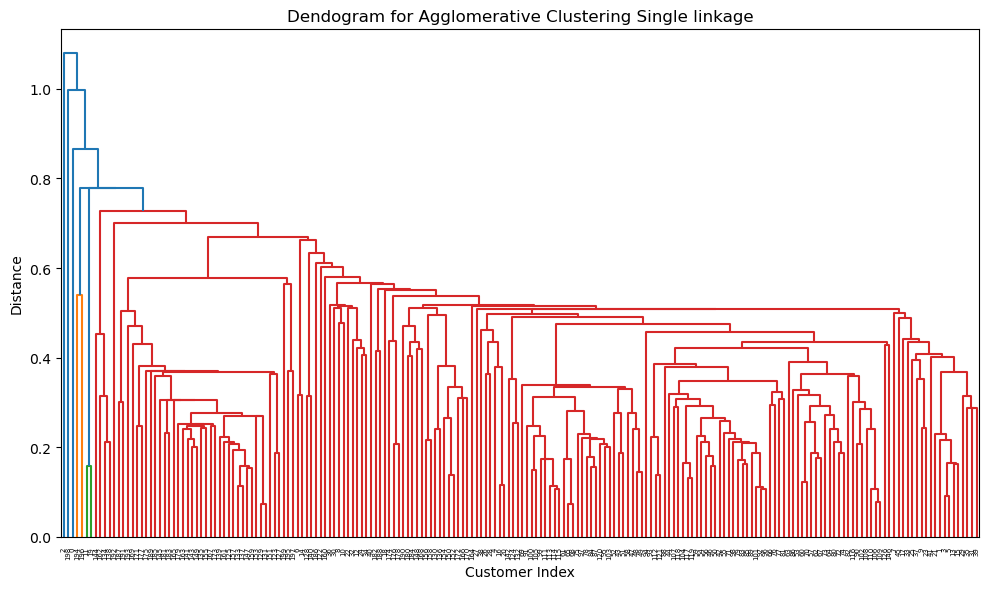

In [18]:
X_dend=dataset[['Age','Annual Income (k$)','Spending Score (1-100)']]

# Normalise the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_dend)

# Perform Agglomerative Clustering to obtain the linkage matrix
Z=linkage(X_scaled, method='single', metric='euclidean')

#Plot the dendogram
plt.figure(figsize=(10,6))
dendrogram(Z,labels=dataset.index.values,orientation='top')
plt.title("Dendogram for Agglomerative Clustering Single linkage")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

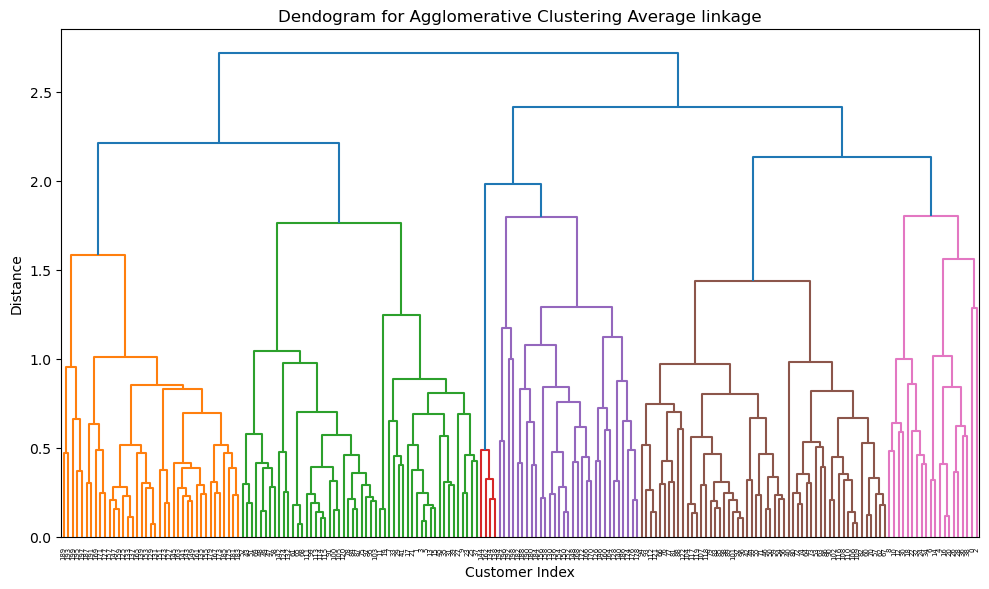

In [19]:
Z=linkage(X_scaled, method='average', metric='euclidean')

#Plot the dendogram
plt.figure(figsize=(10,6))
dendrogram(Z,labels=dataset.index.values,orientation='top')
plt.title("Dendogram for Agglomerative Clustering Average linkage")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Divisive Clustering

In [20]:
from sklearn.cluster import BisectingKMeans

bisect_2 = BisectingKMeans(n_clusters=2)
bisect_5 = BisectingKMeans(n_clusters=5)

y_bisect_2 = bisect_2.fit_predict(X_scaled)
y_bisect_5 = bisect_5.fit_predict(X_scaled)

dataset_1['divisive_2'] = y_bisect_2
dataset_1['divisive_5'] = y_bisect_5

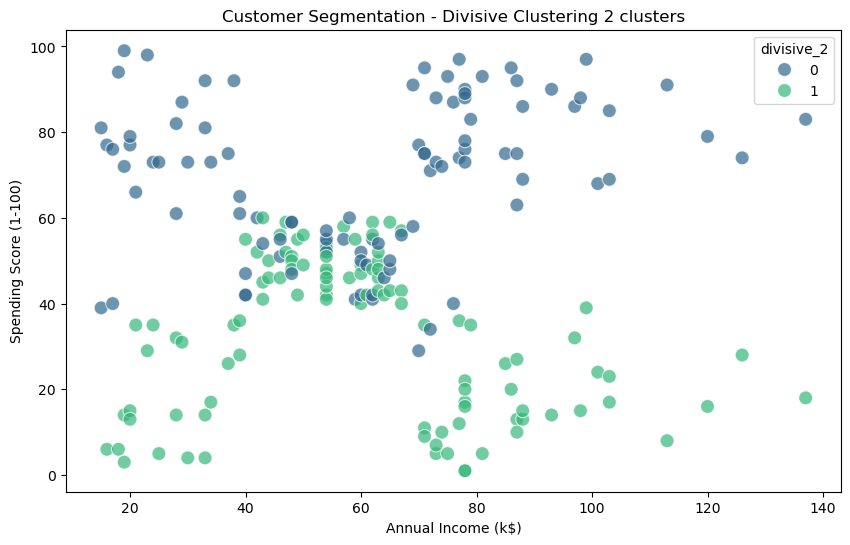

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)', hue='divisive_2', palette='viridis', s=100, alpha=0.7)

plt.title("Customer Segmentation - Divisive Clustering 2 clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

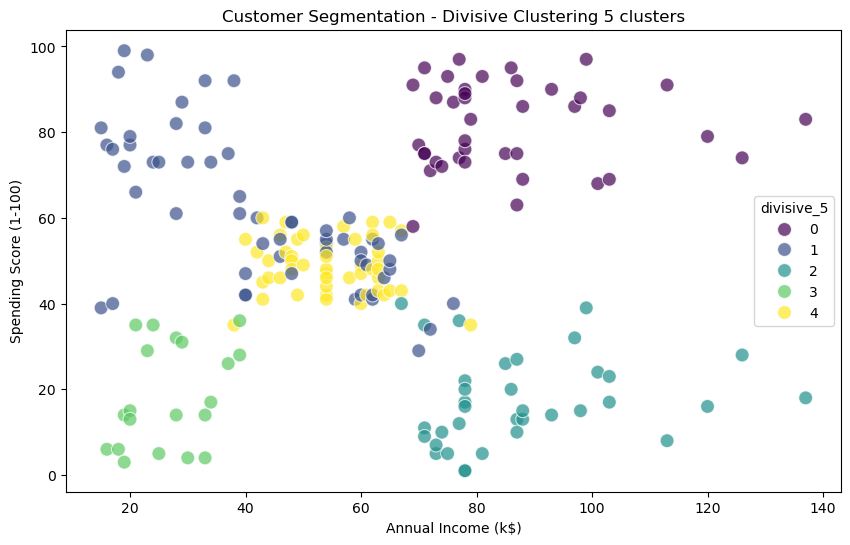

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)', hue='divisive_5', palette='viridis', s=100, alpha=0.7)

plt.title("Customer Segmentation - Divisive Clustering 5 clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

**Clustering Jerárquico Aglomerativo vs Divisivo**

- El clustering divisivo es más complejo en comparación con el clustering aglomerativo, ya que en el caso del clustering divisivo necesitamos un método de clustering plano como "subrutina" para dividir cada cluster hasta que cada dato tenga su propio cluster.
- El clustering divisivo es más eficiente si no generamos una jerarquía completa hasta las hojas de datos individuales. La complejidad temporal de un clustering aglomerativo naive es O(n3) porque escaneamos exhaustivamente la matriz NxN para la distancia más baja en cada una de las N-1 iteraciones.
- Un algoritmo divisivo también es más preciso. El clustering aglomerativo toma decisiones considerando los patrones locales o los puntos vecinos sin tener en cuenta inicialmente la distribución global de los datos. Estas decisiones tempranas no se pueden deshacer. Mientras que el clustering divisivo tiene en cuenta la distribución global de los datos al tomar decisiones de partición de nivel superior.